# **A First Look At a Neural Network**


1.2. Example of a neural network that uses the Python library Keras to learn to classify handwritten digits.

Code samples found in the book [Deep Learning with Python, 2nd Edition (Manning Publications).](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff)

## Part of the class Advanced Methods in Data Analysis II

***
***

**Loading the MNIST dataset in Keras** [MNIST](http://yann.lecun.com/exdb/mnist/)

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

`train_images` and `train_labels` form the training set, the data that the model will learn from.



In [2]:
(X_train_image, y_train_labels), (X_test_image, y_test_labels) = mnist.load_data()


The images are encoded as Numpy arrays, and the labels are an array of digits, ranging
from 0 to 9. The images and labels have a one-to-one correspondence.




In [3]:
#shape
X_train_image.shape

(60000, 28, 28)

In [4]:
#shape
X_test_image.shape

(10000, 28, 28)

In [5]:
y_train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Plot grayscale images. Example

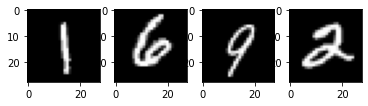

In [7]:
 
plt.subplot(141)
plt.imshow(X_train_image[8], cmap=plt.get_cmap('gray'))
plt.subplot(142)
plt.imshow(X_train_image[13], cmap=plt.get_cmap('gray'))
plt.subplot(143)
plt.imshow(X_train_image[22], cmap=plt.get_cmap('gray'))
plt.subplot(144)
plt.imshow(X_train_image[5], cmap=plt.get_cmap('gray'))
# show plot
plt.show()


**Numpy arrays image 18 training set MNIST**

In [8]:
print(X_train_image[8])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5  63 197   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 230  24   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 254  48   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 255  4

Preprocess the data by reshaping it into the shape the network
expects and scaling it so that all values are in the $[0, 1]$ interval. Previously, our training
images, for instance, were stored in an array of shape $(60000, 28, 28)$ of type
uint8 with values in the $[0, 255]$ interval. We transform it into a float32 array of
shape $(60000, 28 * 28)$ with values between 0 and 1.


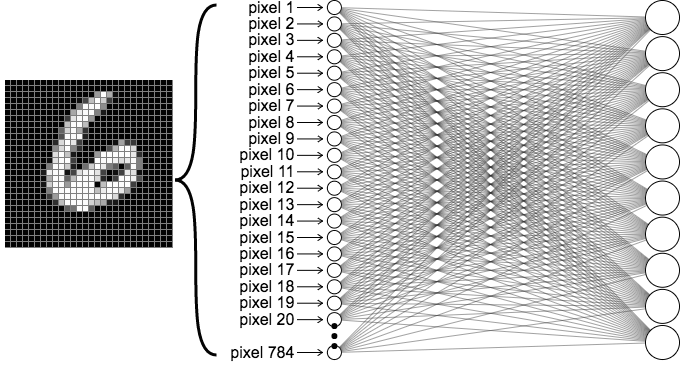

In [9]:
X_train_image = X_train_image.reshape((60000, 28 * 28))
X_train_image = X_train_image.astype('float32') / 255
X_test_image = X_test_image.reshape((10000, 28 * 28))
X_test_image = X_test_image.astype('float32') / 255

In [10]:
from tensorflow.keras.utils import to_categorical


In [11]:
y_train_labels = to_categorical(y_train_labels)
y_test_labels = to_categorical(y_test_labels)

In [12]:
from keras import models
from keras import layers

**Compilation step**
* A loss function—How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
* An optimizer—The mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing—Here, we’ll only care about accuracy
(the fraction of the images that were correctly classified).

In [13]:
model_network = models.Sequential()

In [14]:
model_network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model_network.add(layers.Dense(10, activation='softmax'))

In [15]:
model_network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

Call to the network’s fit method

In [16]:
model_network.fit(X_train_image, y_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2547 - accuracy: 0.9268
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1041 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0687 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0495 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0377 - accuracy: 0.9886


Check that the model performs well on the test set

In [17]:
test_loss, test_acc = model_network.evaluate(X_test_image, y_test_labels)

313/313 [==============================] - 0s 702us/step - loss: 0.0638 - accuracy: 0.9799


**Visualization**


In [18]:
from keras.utils.vis_utils import plot_model

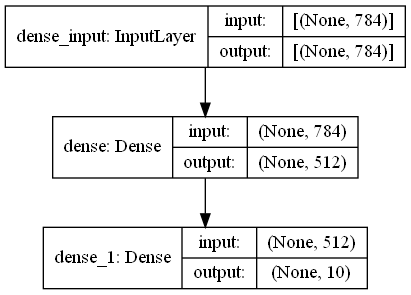

In [19]:
plot_model(model_network, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
from ann_visualizer.visualize import ann_viz


In [37]:
ann_viz(model_network, title="MNIST network", filename="MNIST.gv")

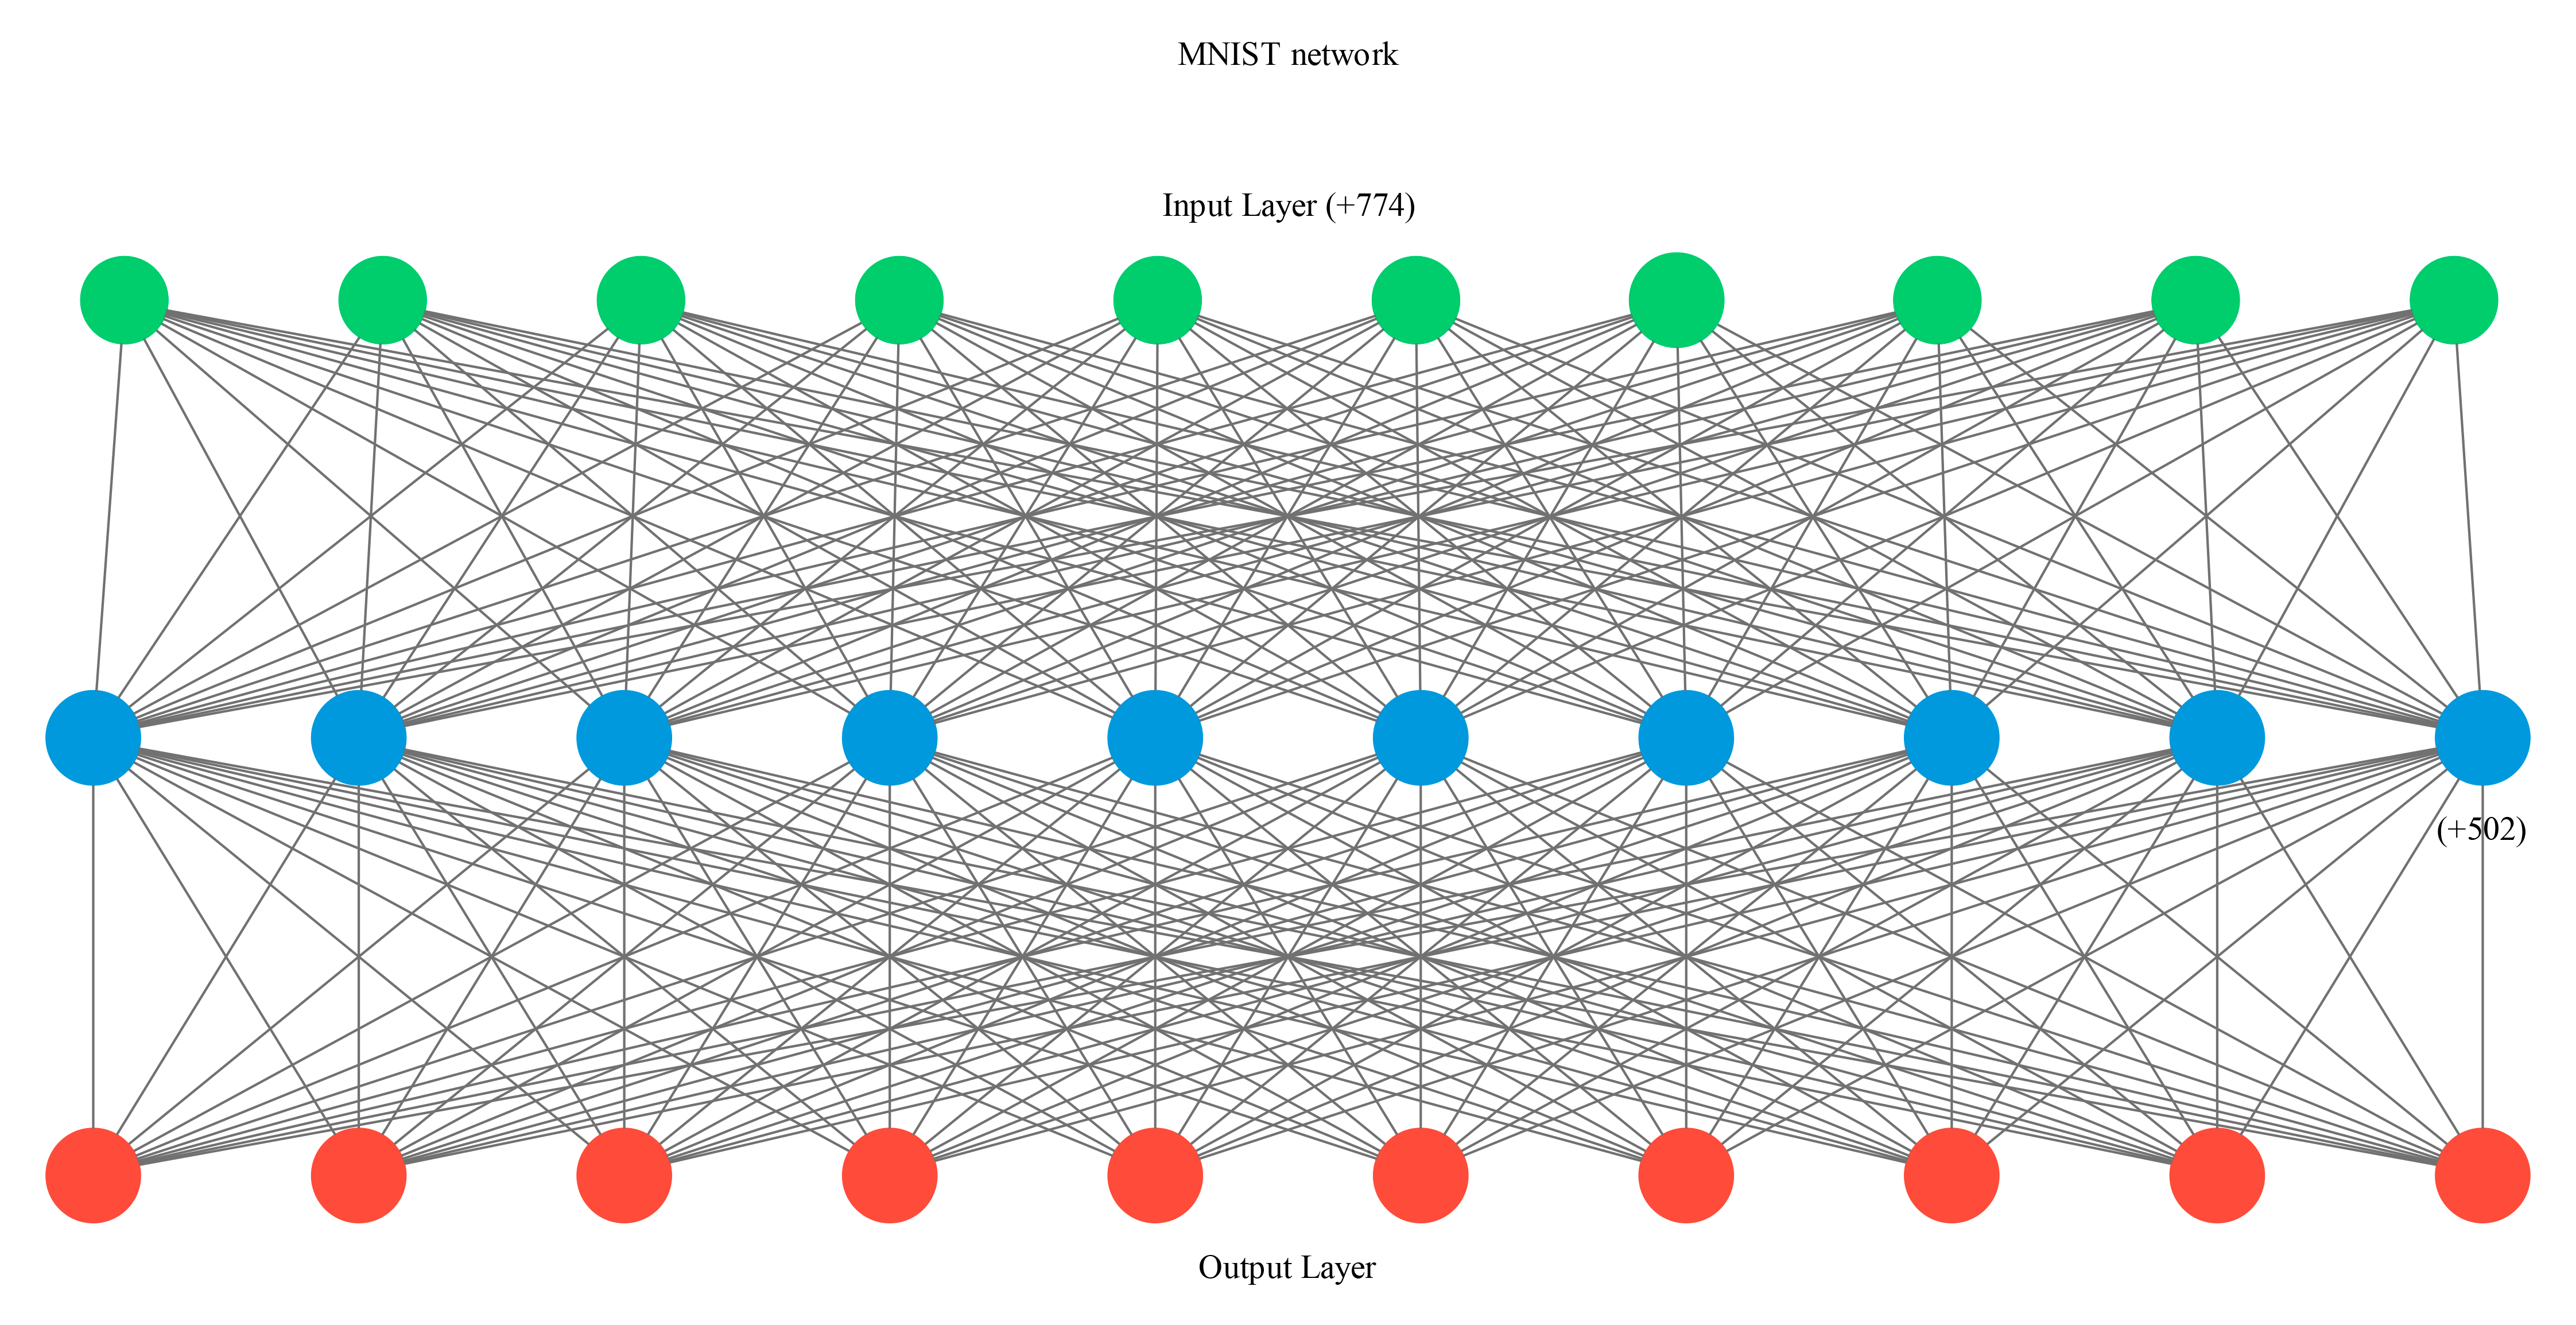